# 在衡量机器学习的精准率（查准率）、召回率（查全率）等指标中，
# 把握原则：视场景而定

## 1. F1 Score二者兼顾

### F1 Score是精准率和召回率的调和平均值

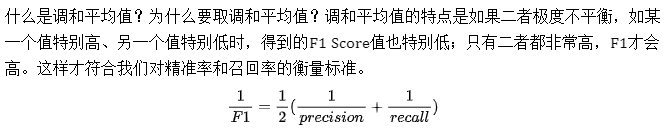

In [1]:
import numpy as np
def f1_score(precision, recall):
    try:
        return 2 * precision * recall / (precision + recall)
    except:
        return 0.0

In [2]:
precision = 0.5
recall  = 0.5
f1_score(precision, recall)

0.5

In [4]:
precision = 0.9
recall = 0.1
f1_score(precision, recall)

0.18000000000000002

## 2. 分类阈值、TPR和FPR

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


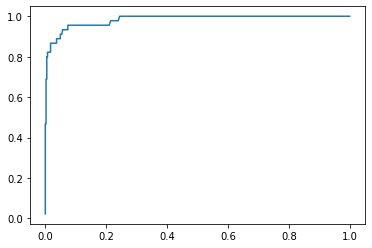

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

# 要构造偏斜数据，将数字9对应索引的元素设置为1，0-8设置为0
y[digits.target == 9] = 1
y[digits.target != 9] = 0

# 使用逻辑回归做一个分类
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# 计算逻辑回归给予X_test样本的决策数据值
# 通过decision_function可以调整精准率和召回率
decision_scores = log_reg.decision_function(X_test)

# 定义混淆矩阵的四个指标
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    # (y_true == 0)向量与数值按位比较，得到的是一个布尔向量
    # 向量与向量按位与，结果还是布尔向量
    # np.sum计算布尔向量中True的个数（True记为1， False记为0）
    return np.sum((y_true == 0) & (y_predict == 0)) # 向量与向量按位与，结果还是向量
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    # (y_true == 0):向量与数值按位比较，得到的是一个布尔向量
    # 向量与向量按位与，结果还是布尔向量
    # np.sum 计算布尔向量中True的个数（True记为1，False记为0）
    return np.sum((y_true == 0) & (y_predict == 1)) # 向量与向量按位与，结果还是向量
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    # (y_true == 0):向量与数值按位比较，得到的是一个布尔向量
    # 向量与向量按位与，结果还是布尔向量
    # np.sum 计算布尔向量中True的个数（True记为1， False记为0）
    return np.sum((y_true == 1) & (y_predict == 0)) # 向量与向量按位与，结果还是向量）
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    # (y_true == 0):向量与数值按位比较，得到的是一个布尔向量
    # 向量与向量按位与，结果还是布尔向量
    # np.sum 计算布尔向量中True的个数（True记为1， False记为0）
    return np.sum((y_true == 1) & (y_predict == 1)) # 向量与向量按位与，结果还是向量

# TPR
def TPR(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try:
        return tp / (tp + fn)
    except:
        return 0.0

# FPR
def FPR(y_true, y_predict):
    fp = FP(y_true, y_predict)
    tn = TN(y_true, y_predict)
    try:
        return fp / (fp + tn)
    except:
        return 0.0

fprs = []
tprs = []

# 以0.1为步长，遍历decision_sores中的最小值到最大值的所有数据点，将其作为阈值集合
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    # decision_scores >= threshold是布尔型向量，用dtype设置为int
    # 大于等于阈值threshold分类为1，小于为0，用这种方法得到预测值
    y_predict = np.array(decision_scores >= threshold, dtype = int)
#     print(y_predict)
#     print(y_test)
#     print(FPR(y_test, y_predict))
    # 对于每个阈值，所得到的FPR和TPR都添加到相应的队列中
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))
    
# 绘制ROC曲线，x轴是fpr值， y轴是tpr值
plt.plot(fprs, tprs)
plt.show()

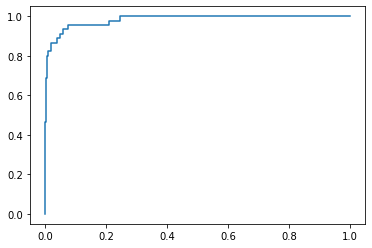

In [14]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)
plt.plot(fprs, tprs)
plt.show()

In [15]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, decision_scores)

0.9830452674897119